<a href="https://colab.research.google.com/github/Kalaka0908/sf_data_science/blob/kalaka/%D1%82%D0%B5%D1%81%D1%82%D0%BE%D0%B2%D0%BE%D0%B5_%D0%B7%D0%B0%D0%B4%D0%B0%D0%BD%D0%B8%D0%B5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Читаем данные таблицы!

In [ ]:
import pandas as pd
df = pd.read_excel('/content/Таблица ЛС.xlsx', engine='openpyxl')
df.head()



,ИД дома,ИД подъезда,ИД квартиры,Лицевой счет (ЛС),Услуга,Ставка тарифа,Статус услуги,Дата начала услуги
0,100,1624,43036,43036,ТО МКД,5.2,Активна,2008-01-23
1,100,1624,43037,43037,ТО МКД,5.4,Активна,2008-01-23
2,100,1624,43038,43038,ТО МКД,5.2,Активна,2008-01-23
3,100,1624,43039,43039,ТО МКД,5.2,Активна,2008-01-23
4,100,1624,43040,43040,ТО МКД,5.2,Активна,2008-01-23


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49543 entries, 0 to 49542
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   ИД дома             49543 non-null  int64         
 1   ИД подъезда         49543 non-null  int64         
 2   ИД квартиры         49543 non-null  int64         
 3   Лицевой счет (ЛС)   49543 non-null  int64         
 4   Услуга              49543 non-null  object        
 5   Ставка тарифа       49316 non-null  float64       
 6   Статус услуги       49543 non-null  object        
 7   Дата начала услуги  49543 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(1), int64(4), object(2)
memory usage: 3.0+ MB


Найдем сумму пустых значений

In [ ]:
df.isnull().sum()

ИД дома                 0
ИД подъезда             0
ИД квартиры             0
Лицевой счет (ЛС)       0
Услуга                  0
Ставка тарифа         227
Статус услуги           0
Дата начала услуги      0
dtype: int64

мы видим, что больше всего пропущенных значени в "Ставка тарифа". Скорее всего это из-за того что у абонентов есть доп.услуги

In [ ]:
df['Ставка тарифа'].value_counts()


5.4    22350
5.2    18954
5.0     4845
4.5     2409
4.3      287
4.0      273
4.7       68
5.6       66
4.8       63
9.7        1
Name: Ставка тарифа, dtype: int64

посмотрим количество уникальных значений по каждому тарифу. И увидим общую картину

In [ ]:
df1 = pd.read_excel('/content/sample_data/Таблица платежей.xlsx', engine='openpyxl')
df1.head()


,ЛС,Сумма платежа,Дата загрузки,Источник платежа,способ оплаты,Комментарий к платежу
0,1,4.8,2019-04-16,Ручной ввод,Офис,NaN
1,1,14.4,2018-10-17,Ввод из реестра,Сбербанк России,NaN
2,1,14.4,2019-01-21,Ввод из реестра,КС банк,NaN
3,1,32.4,2020-12-11,Ввод из реестра,КС банк,NaN
4,1,56.4,2018-02-09,Ввод из реестра,КС банк,NaN


import numpy as np
from google.colab import autoviz

def value_plot(df, y, figscale=1):
  from matplotlib import pyplot as plt
  df[y].plot(kind='line', figsize=(8 * figscale, 4 * figscale), title=y)
  plt.gca().spines[['top', 'right']].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(_df_0, *['Сумма платежа'], **{})
chart

import numpy as np
from google.colab import autoviz

def histogram(df, colname, num_bins=20, figscale=1):
  from matplotlib import pyplot as plt
  df[colname].plot(kind='hist', bins=num_bins, title=colname, figsize=(8*figscale, 4*figscale))
  plt.gca().spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(_df_1, *['Сумма платежа'], **{})
chart

import numpy as np
from google.colab import autoviz

def categorical_histogram(df, colname, figscale=1, mpl_palette_name='Dark2'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  df.groupby(colname).size().plot(kind='barh', color=sns.palettes.mpl_palette(mpl_palette_name), figsize=(8*figscale, 4.8*figscale))
  plt.gca().spines[['top', 'right',]].set_visible(False)
  return autoviz.MplChart.from_current_mpl_state()

chart = categorical_histogram(_df_2, *['Источник платежа'], **{})
chart

import numpy as np
from google.colab import autoviz

def categorical_histogram(df, colname, figscale=1, mpl_palette_name='Dark2'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  df.groupby(colname).size().plot(kind='barh', color=sns.palettes.mpl_palette(mpl_palette_name), figsize=(8*figscale, 4.8*figscale))
  plt.gca().spines[['top', 'right',]].set_visible(False)
  return autoviz.MplChart.from_current_mpl_state()

chart = categorical_histogram(_df_3, *['способ оплаты'], **{})
chart

import numpy as np
from google.colab import autoviz

def heatmap(df, x_colname, y_colname, figscale=1, mpl_palette_name='viridis'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  import pandas as pd
  plt.subplots(figsize=(8 * figscale, 8 * figscale))
  df_2dhist = pd.DataFrame({
      x_label: grp[y_colname].value_counts()
      for x_label, grp in df.groupby(x_colname)
  })
  sns.heatmap(df_2dhist, cmap=mpl_palette_name)
  plt.xlabel(x_colname)
  plt.ylabel(y_colname)
  return autoviz.MplChart.from_current_mpl_state()

chart = heatmap(_df_4, *['Источник платежа', 'способ оплаты'], **{})
chart

import numpy as np
from google.colab import autoviz

def violin_plot(df, value_colname, facet_colname, figscale=1, mpl_palette_name='Dark2', **kwargs):
  from matplotlib import pyplot as plt
  import seaborn as sns
  figsize = (12 * figscale, 1.2 * figscale * len(df[facet_colname].unique()))
  plt.figure(figsize=figsize)
  sns.violinplot(df, x=value_colname, y=facet_colname, palette=mpl_palette_name, **kwargs)
  sns.despine(top=True, right=True, bottom=True, left=True)
  return autoviz.MplChart.from_current_mpl_state()

chart = violin_plot(_df_5, *['Сумма платежа', 'Источник платежа'], **{'inner': 'stick'})
chart

import numpy as np
from google.colab import autoviz

def violin_plot(df, value_colname, facet_colname, figscale=1, mpl_palette_name='Dark2', **kwargs):
  from matplotlib import pyplot as plt
  import seaborn as sns
  figsize = (12 * figscale, 1.2 * figscale * len(df[facet_colname].unique()))
  plt.figure(figsize=figsize)
  sns.violinplot(df, x=value_colname, y=facet_colname, palette=mpl_palette_name, **kwargs)
  sns.despine(top=True, right=True, bottom=True, left=True)
  return autoviz.MplChart.from_current_mpl_state()

chart = violin_plot(_df_6, *['Сумма платежа', 'способ оплаты'], **{'inner': 'stick'})
chart

import numpy as np
from google.colab import autoviz

def time_series_multiline(df, timelike_colname, value_colname, series_colname, figscale=1, mpl_palette_name='Dark2'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  figsize = (10 * figscale, 5.2 * figscale)
  palette = list(sns.palettes.mpl_palette(mpl_palette_name))
  def _plot_series(series, series_name, series_index=0):
    if value_colname == 'count()':
      counted = (series[timelike_colname]
                 .value_counts()
                 .reset_index(name='counts')
                 .rename({'index': timelike_colname}, axis=1)
                 .sort_values(timelike_colname, ascending=True))
      xs = counted[timelike_colname]
      ys = counted['counts']
    else:
      xs = series[timelike_colname]
      ys = series[value_colname]
    plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

  fig, ax = plt.subplots(figsize=figsize, layout='constrained')
  df = df.sort_values(timelike_colname, ascending=True)
  if series_colname:
    for i, (series_name, series) in enumerate(df.groupby(series_colname)):
      _plot_series(series, series_name, i)
    fig.legend(title=series_colname, bbox_to_anchor=(1, 1), loc='upper left')
  else:
    _plot_series(df, '')
  sns.despine(fig=fig, ax=ax)
  plt.xlabel(timelike_colname)
  plt.ylabel(value_colname)
  return autoviz.MplChart.from_current_mpl_state()

chart = time_series_multiline(_df_7, *['Дата загрузки', 'count()', 'Источник платежа'], **{})
chart

import numpy as np
from google.colab import autoviz

def time_series_multiline(df, timelike_colname, value_colname, series_colname, figscale=1, mpl_palette_name='Dark2'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  figsize = (10 * figscale, 5.2 * figscale)
  palette = list(sns.palettes.mpl_palette(mpl_palette_name))
  def _plot_series(series, series_name, series_index=0):
    if value_colname == 'count()':
      counted = (series[timelike_colname]
                 .value_counts()
                 .reset_index(name='counts')
                 .rename({'index': timelike_colname}, axis=1)
                 .sort_values(timelike_colname, ascending=True))
      xs = counted[timelike_colname]
      ys = counted['counts']
    else:
      xs = series[timelike_colname]
      ys = series[value_colname]
    plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

  fig, ax = plt.subplots(figsize=figsize, layout='constrained')
  df = df.sort_values(timelike_colname, ascending=True)
  if series_colname:
    for i, (series_name, series) in enumerate(df.groupby(series_colname)):
      _plot_series(series, series_name, i)
    fig.legend(title=series_colname, bbox_to_anchor=(1, 1), loc='upper left')
  else:
    _plot_series(df, '')
  sns.despine(fig=fig, ax=ax)
  plt.xlabel(timelike_colname)
  plt.ylabel(value_colname)
  return autoviz.MplChart.from_current_mpl_state()

chart = time_series_multiline(_df_8, *['Дата загрузки', 'count()', 'способ оплаты'], **{})
chart

import numpy as np
from google.colab import autoviz

def time_series_multiline(df, timelike_colname, value_colname, series_colname, figscale=1, mpl_palette_name='Dark2'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  figsize = (10 * figscale, 5.2 * figscale)
  palette = list(sns.palettes.mpl_palette(mpl_palette_name))
  def _plot_series(series, series_name, series_index=0):
    if value_colname == 'count()':
      counted = (series[timelike_colname]
                 .value_counts()
                 .reset_index(name='counts')
                 .rename({'index': timelike_colname}, axis=1)
                 .sort_values(timelike_colname, ascending=True))
      xs = counted[timelike_colname]
      ys = counted['counts']
    else:
      xs = series[timelike_colname]
      ys = series[value_colname]
    plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

  fig, ax = plt.subplots(figsize=figsize, layout='constrained')
  df = df.sort_values(timelike_colname, ascending=True)
  if series_colname:
    for i, (series_name, series) in enumerate(df.groupby(series_colname)):
      _plot_series(series, series_name, i)
    fig.legend(title=series_colname, bbox_to_anchor=(1, 1), loc='upper left')
  else:
    _plot_series(df, '')
  sns.despine(fig=fig, ax=ax)
  plt.xlabel(timelike_colname)
  plt.ylabel(value_colname)
  return autoviz.MplChart.from_current_mpl_state()

chart = time_series_multiline(_df_9, *['ЛС', 'count()', 'Источник платежа'], **{})
chart

import numpy as np
from google.colab import autoviz

def time_series_multiline(df, timelike_colname, value_colname, series_colname, figscale=1, mpl_palette_name='Dark2'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  figsize = (10 * figscale, 5.2 * figscale)
  palette = list(sns.palettes.mpl_palette(mpl_palette_name))
  def _plot_series(series, series_name, series_index=0):
    if value_colname == 'count()':
      counted = (series[timelike_colname]
                 .value_counts()
                 .reset_index(name='counts')
                 .rename({'index': timelike_colname}, axis=1)
                 .sort_values(timelike_colname, ascending=True))
      xs = counted[timelike_colname]
      ys = counted['counts']
    else:
      xs = series[timelike_colname]
      ys = series[value_colname]
    plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

  fig, ax = plt.subplots(figsize=figsize, layout='constrained')
  df = df.sort_values(timelike_colname, ascending=True)
  if series_colname:
    for i, (series_name, series) in enumerate(df.groupby(series_colname)):
      _plot_series(series, series_name, i)
    fig.legend(title=series_colname, bbox_to_anchor=(1, 1), loc='upper left')
  else:
    _plot_series(df, '')
  sns.despine(fig=fig, ax=ax)
  plt.xlabel(timelike_colname)
  plt.ylabel(value_colname)
  return autoviz.MplChart.from_current_mpl_state()

chart = time_series_multiline(_df_10, *['ЛС', 'count()', 'способ оплаты'], **{})
chart

Error: Runtime no longer has a reference to this dataframe, please re-run this cell and try again.


Из визуализации мы видем, что большинство оплачивает с помощью реестра из КС банка. Сумма платежа абсюлютно разная. Можно визуализировать и иследовать данную графу

In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 356846 entries, 0 to 356845
Data columns (total 6 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   ЛС                     356846 non-null  int64         
 1   Сумма платежа          356846 non-null  float64       
 2   Дата загрузки          356846 non-null  datetime64[ns]
 3   Источник платежа       356846 non-null  object        
 4   способ оплаты          356846 non-null  object        
 5   Комментарий к платежу  5876 non-null    object        
dtypes: datetime64[ns](1), float64(1), int64(1), object(3)
memory usage: 16.3+ MB


# 1.Выполнить проверку данных в таблице лицевых счетов. Кратко описать суть проверки,результат проверки и предпринятый или предлагаемый способ устранение дефекта данных (если обнаружены артефакты).
Но мы видим выбросы в виде комментариев, т.к на комментарии мы не можем повлиять, но в них можно уловить суть проблем с дальнейшим исправление. Далее я немного иследовала этот столбик и увидела общую закономерность и проблему с личными считами.

In [ ]:
df1.isnull().sum()

ЛС                            0
Сумма платежа                 0
Дата загрузки                 0
Источник платежа              0
способ оплаты                 0
Комментарий к платежу    350970
dtype: int64

тут важных пропущенных значений нет. Только комментарии к платежу

In [ ]:
df1['Сумма платежа'].value_counts()

15.000    35703
5.000     28847
15.600    21987
14.400    21418
60.000    19350
          ...  
4.464         1
10.693        1
59.959        1
6.510         1
40.010        1
Name: Сумма платежа, Length: 7937, dtype: int64

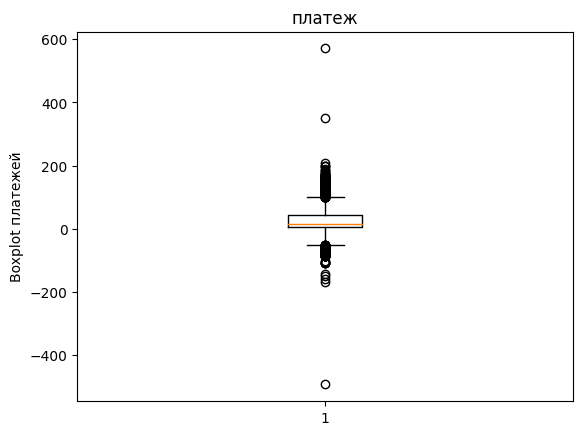

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

data = pd.DataFrame(df)

# строим график "ящик с усами"
plt.boxplot(df1['Сумма платежа'])

# добавляем название графика и оси x
plt.title('платеж')
plt.ylabel('Boxplot платежей')

# показываем график
plt.show()

тут мы видим за пределами ящика с усами несколько выбросов, положительных и отрицательных. ОТрицателье значения связны наверно с возвратом. А положителые наверное с погашением долга! По-идее это можно иследовать и выявить является это аномалтей или просто элементарный выброс, который тем не мене может влиять на наши данные.

## 2.**Рассчитать** для каждого ЛС сумму всех поступивших платежей с учетом возвратов, но исключая списания.

In [ ]:
data = pd.DataFrame(df1)

# Отфильтровать только поступившие платежи (положительные значения)
df_filtered = data[data['Сумма платежа'] > 0]

# Сгруппировать данные по ЛС и посчитать сумму платежей
df_payment_sum = df_filtered.groupby('ЛС')['Сумма платежа'].sum()

print(df_payment_sum)

ЛС
1         182.400
2        2408.002
3         230.400
4         236.400
5        1306.300
           ...   
49146      62.400
49148      31.200
49149      31.200
49150      25.810
49151      65.630
Name: Сумма платежа, Length: 41422, dtype: float64


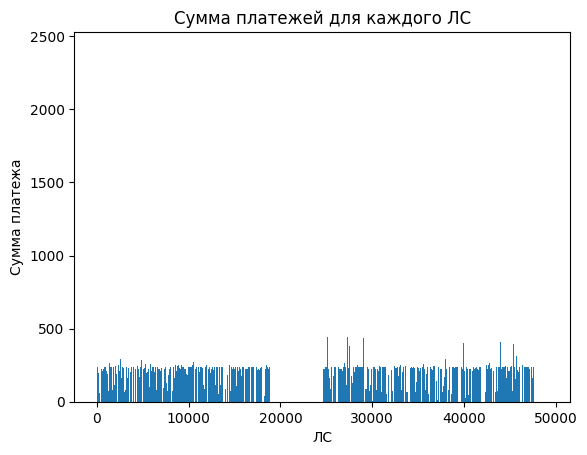

In [ ]:
import matplotlib.pyplot as plt

# Создать график суммы платежей
plt.bar(df_payment_sum.index, df_payment_sum)

# Добавить подписи осей
plt.xlabel('ЛС')
plt.ylabel('Сумма платежа')

# Добавить заголовок графика
plt.title('Сумма платежей для каждого ЛС')

# Показать график
plt.show()

# 3.Рассчитать для каждого ЛС плановую выручку с учетом дат начала услуг на ЛС и ставки тарифа

In [ ]:
import pandas as pd

# Загрузка данных из таблиц
df = pd.read_excel('/content/Таблица ЛС.xlsx')
df1 = pd.read_excel('/content/sample_data/Таблица платежей.xlsx')

# Объединение таблиц по полю "Лицевой счет (ЛС)" и "ЛС"
merged_df = pd.merge(df, df1, left_on='Лицевой счет (ЛС)', right_on='ЛС', how='inner')

# Создание колонки "Плановая выручка"
merged_df['Плановая выручка'] = 0

# Расчет плановой выручки для каждой строки
for index, row in merged_df.iterrows():
    дата_начала_услуги = row['Дата начала услуги']
    ставка_тарифа = row['Ставка тарифа']
    дата_загрузки_платежа = row['Дата загрузки']

    # Расчет количества дней между датами и умножение на ставку тарифа
    плановая_выручка = (дата_загрузки_платежа - дата_начала_услуги).days * ставка_тарифа

    # Запись плановой выручки в таблицу
    merged_df.at[index, 'Плановая выручка'] = плановая_выручка

# Расчет общей плановой выручки для каждого ЛС
общая_плановая_выручка = merged_df.groupby('ЛС')['Плановая выручка'].sum()

print(общая_плановая_выручка)


ЛС
1         123014.4
2        2359156.8
3         972707.4
4          97858.8
5        1605960.0
           ...    
49146        395.2
49148        534.6
49149        631.8
49150      29592.0
49151      57834.0
Name: Плановая выручка, Length: 41382, dtype: float64


тут можно смотреть по каждому личному счету


# Рассчитать для каждого ЛС сальдо: плановая выручка (п. 3) минус сумма платежей (из
п. 2).

In [ ]:
saldo = общая_плановая_выручка - df_payment_sum
print(saldo)

ЛС
1         122832.000
2        2356748.798
3         972477.000
4          97622.400
5        1604653.700
            ...     
49146        332.800
49148        503.400
49149        600.600
49150      29566.190
49151      57768.370
Length: 41422, dtype: float64


Пояснение: общая_плановая_выручка - это сумма плановой выручки, полученная в результате группировки по ЛС и суммирования значений "Плановая выручка", а df_payment_sum - это сумма платежей, полученная в результате группировки по ЛС и суммирования значений "Сумма платежа".

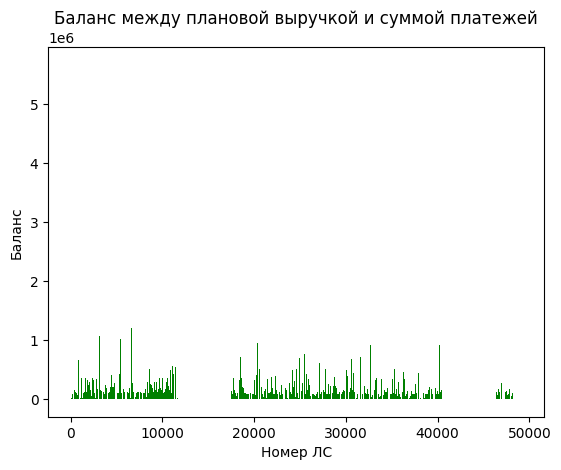

In [ ]:
import matplotlib.pyplot as plt

# Создание графика
fig, ax = plt.subplots()

# Получение данных по балансу
saldo = общая_плановая_выручка - df_payment_sum

# Создание списков для данных графика
ls_numbers = saldo.index
balance = saldo.values

# Определение цветов для положительных и отрицательных значений
colors = ['green' if x >= 0 else 'red' for x in balance]

# Построение столбчатой диаграммы
ax.bar(ls_numbers, balance, color=colors)

# Настройка осей и заголовка графика
ax.set_xlabel('Номер ЛС')
ax.set_ylabel('Баланс')
ax.set_title('Баланс между плановой выручкой и суммой платежей')

# Показ графика
plt.show()

На графике мы видим баланс между общей плановой выручкой и суммой платежей для каждого ЛС с помощью столбчатой диаграммы. Зеленые столбцы представляют положительное значение баланса, а красные - отрицательное(но красные не заметны).

# 5.Рассчитать для каждой квартиры частоту платежей и количество оплаченных тарифов а календарный год.

In [ ]:
# объединение таблиц по идентификатору квартиры
merged_df = pd.merge(df, df1, left_on='ИД квартиры', right_on='ЛС')

# вычисление количества платежей для каждой квартиры
payment_count = merged_df.groupby('ИД квартиры').size()

# вычисление количества оплаченных тарифов для каждой квартиры
tariff_count = merged_df.groupby(['ИД квартиры', 'Услуга']).size().groupby('ИД квартиры').size()

# рассчет частоты платежей для каждой квартиры
yearly_payment_frequency = payment_count / 365

# извлечение года из даты начала услуги
merged_df['Год'] = merged_df['Дата начала услуги'].dt.year

# вывод результатов
result = pd.DataFrame({'Частота платежей': yearly_payment_frequency, 'Количество оплаченных тарифов': tariff_count})
result['Год'] = merged_df.groupby('ИД квартиры')['Год'].first()
print(result)

             Частота платежей  Количество оплаченных тарифов   Год
ИД квартиры                                                       
1                    0.049315                              2  2006
2                    0.273973                              1  2007
3                    0.101370                              1  2006
4                    0.010959                              1  2006
5                    0.167123                              1  2006
...                       ...                            ...   ...
48400                0.030137                              1  2014
48401                0.005479                              1  2014
48402                0.041096                              1  2014
48403                0.008219                              1  2014
48405                0.008219                              1  2014

[40994 rows x 3 columns]


по результатам мы можем видеть у каждого количесвтво оплаченных тарифов, а так же частоту платежей с целыю выявления недобросованных абонентов

# Тут я иследовалава столбик Комментарий к платежу

In [ ]:
unique_comments = df1['Комментарий к платежу'].unique()
print(unique_comments)

[nan 'Беговатов ВВ' 'ошибочные платежи с сайта' 'ошибочные платежи'
 'ошибочные платежи с сайта.' 'ошибочные платежи с сайты' 'ошиблась лс'
 'Прочее; сгорел монитор' 'Потерянные платежи во время реорганизации'
 'В соответствии с приказом № <..>СПИСАНИЕ'
 'В соответствии с приказом № <..>ПРОДАЖА'
 'не на тот лс перечислены деньги'
 'не на тот счет поступили деньга, заявление написано, чек прилагается'
 'Оплата ДЗ ' 'не работал МКД\\по заявлению'
 'перенос платежа, ошиблись при оплате, верны счет 27767'
 'смена собственника квартиры\\'
 'В соответствии с приказом № <..>СПИСАНИЕ ПРОДАННЫХ БДЗ'
 'Отсутствие абонента; проживала в деревне' 'Прочее; смерть собственника'
 'Не работал МКД; не работал домофон' 'Прочее; умер собственник'
 'прочее\\' 'зачислен ошибочно, верный л/с 34969'
 'ошиблись л\\с, вернй счет 6266'
 'Отсутствие абонента; долг предидущих собственников' 'не работал МКД\\'
 'по заявлению' 'спецпроект по работе с ДЗ\\'
 'Отсутствие абонента; задолженность предидущего собственник

In [ ]:
comments_count = df1['Комментарий к платежу'].nunique()
print("Количество уникальных комментариев:", comments_count)

# Вычисление статистики по столбцу "комментарии к платежу"
comments_stats = data['Комментарий к платежу'].describe()
print(comments_stats)


Количество уникальных комментариев: 451
count                                          5876
unique                                          451
top       Потерянные платежи во время реорганизации
freq                                           1520
Name: Комментарий к платежу, dtype: object


Мы можем дальше по-разному иследовать столбец "комментарии к платежу" c целью выявления общих проблем абонентом и устранения изьянов

In [ ]:
from google.colab import files

# сохраняем файл
with open('тестовое задание.ipynb', 'w') as f:
  f.write('Hello, World!')

# отправляем файл
files.download('тестовое задание.ipynb')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>